In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
l = 3
h = l / 40
tau = 0.05
M = 50
N = int(l / h)

In [3]:
def fi(x):
    return x*(1-np.exp(x-3))

def k(x):
    return x+0.6

def f(x,t):
    return 0

def g1(t):
    return 0

def g2(t):
    return 3**t-1

def k1(x):
    if x <= l/3:
        k1 = k(x)
    elif x > l/3 and x <= 2*l/3:
        k1 = 10*k(x)
    elif x > 2*l/3 and x <= l:
        k1 = k(x)
    return k1

def k2(x):
    if x <= l/3:
        k2 = k(x)
    elif x > l/3 and x <= 2*l/3:
        k2 = 0.1*k(x)
    elif x > 2*l/3 and x <= l:
        k2 = k(x)
    return k2

In [4]:
def implicit_scheme(fi, g1, g2, f, k, l, h, tau, M, N):

    x_values = np.linspace(0, l, N)
    t_values = np.linspace(0, 50*tau,M)
    
    U = np.zeros((M, N))
    U[:, 0] = g1(t_values)
    U[:, -1] = g2(t_values)
    U[0, :] = fi(x_values)

    
    A = np.zeros((N, N))
    A[0,0] = 1
    for i in range(1, N - 1):
        gamma = k(x_values[i])*tau / h**2
        A[i, i - 1] = gamma
        A[i, i] = -(1+2*gamma)
        A[i, i + 1] = gamma
    A[N-1,N-1] = 1

    

    for j in range(1, M):
        F = np.zeros(N)
        for i in range(1,N):
            F[i] = -U[j-1,i] - tau * f(x_values[i], t_values[j]) 
        F[0] = g1(t_values[j])
        F[-1] = g2(t_values[j])
        U[j,:] = np.linalg.solve(A, F)
     
    return U

In [5]:
U_k = implicit_scheme(fi, g1, g2, f, k, l, h, tau, M, N)

In [6]:
U_k1 = implicit_scheme(fi, g1, g2, f, k1, l, h, tau, M, N)

In [7]:
U_k2 = implicit_scheme(fi, g1, g2, f, k2, l, h, tau, M, N)

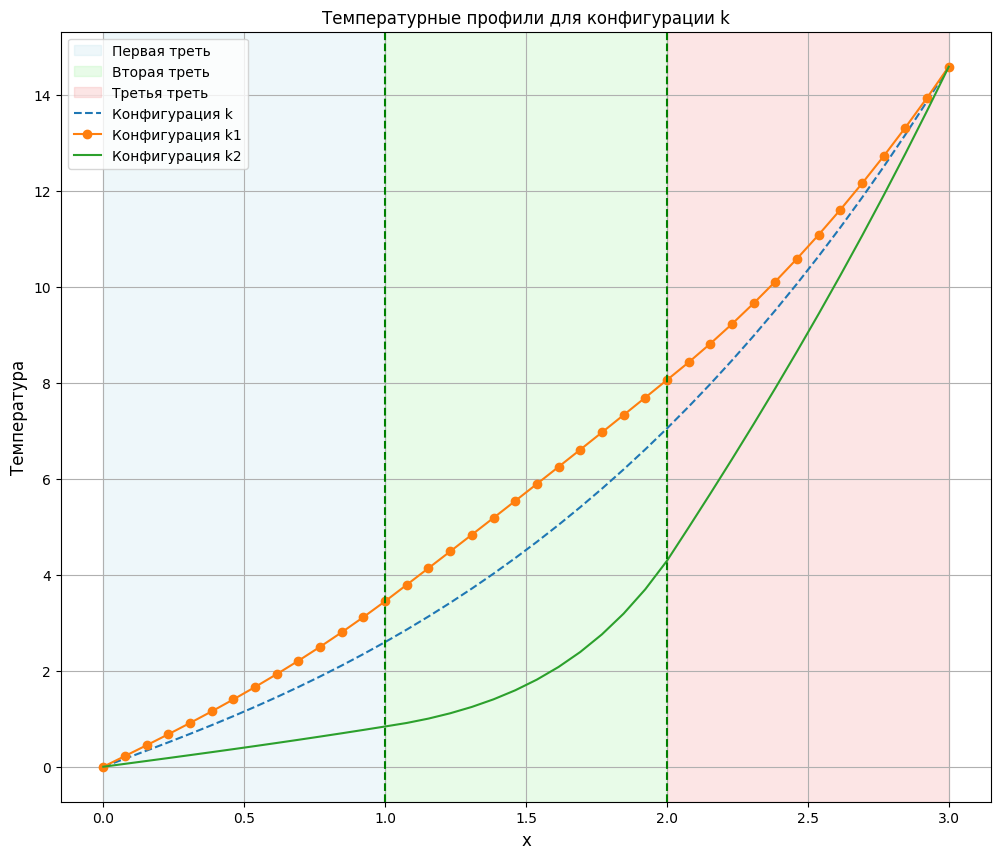

In [10]:
x_values = np.linspace(0, l, N)
fig, ax = plt.subplots(figsize=(12,10))

ax.axvspan(0, l/3, color='lightblue', alpha=0.2, label='Первая треть')
ax.axvspan(l/3, 2*l/3, color='lightgreen', alpha=0.2, label='Вторая треть')
ax.axvspan(2*l/3, l, color='lightcoral', alpha=0.2, label='Третья треть')

ax.plot(x_values, U_k[M-1, :], label=f"Конфигурация k", linestyle='--',)
ax.plot(x_values, U_k1[M-1, :], label=f"Конфигурация k1", linestyle=None, marker = 'o')
ax.plot(x_values, U_k2[M-1, :], label=f"Конфигурация k2")
ax.axvline(x=l/3, color='g', linestyle='--')
ax.axvline(x=2*l/3, color='g', linestyle='--')
    
ax.set_title(f'Температурные профили для конфигурации k')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('Температура', fontsize=12)
ax.legend()
plt.grid(True)
plt.show()